In [58]:
import collections
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

from package import demand, pricing, inventory, hurricane

%matplotlib inline 

In [37]:
start_time = -2
end_time = 366
total_day = 365

MAX_FRESHNESS = 100
MAX_PRICE = 30

### pricing strategy

In [32]:
inventory_level = np.arange(0, 120, 1)

In [33]:
price_strategy = pricing.Price(max_price=MAX_PRICE)

linear = price_strategy.linear_price(inventory_level)
constant = [price_strategy.constant_price() for _ in range(len(inventory_level))]

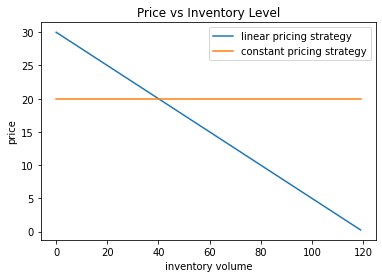

In [34]:
plt.plot(inventory_level, linear, label='linear pricing strategy')
plt.plot(inventory_level, constant, label='constant pricing strategy')
plt.title('Price vs Inventory Level')
plt.xlabel('inventory volume')
plt.ylabel('price')
plt.legend()

### Customers Arrival and Demand

In [35]:
customers = demand.Customers()
arrival_time = customers.get_arrival()
arrival_func = customers.arrival_function()
time = np.linspace(0, total_day, 10000)

(-2.0, 366.0)

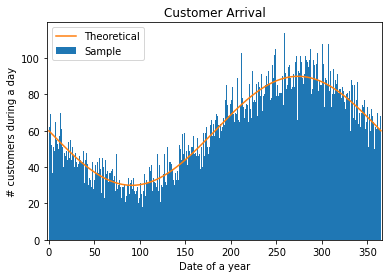

In [36]:
plt.hist(arrival_time, bins=total_day, label='Sample')
plt.plot(time, arrival_func(time), label='Theoretical')

plt.title('Customer Arrival')
plt.legend()
plt.xlabel('Date of a year')
plt.ylabel('# customers during a day')
plt.xlim(start_time, end_time)

In [38]:
price = np.arange(0, MAX_PRICE, 0.005)
freshness = np.arange(0, MAX_FRESHNESS, 0.005)
price, freshness = np.meshgrid(price, freshness)

demand_func = customers.demand_function()
max_demand = demand_func(price, freshness)

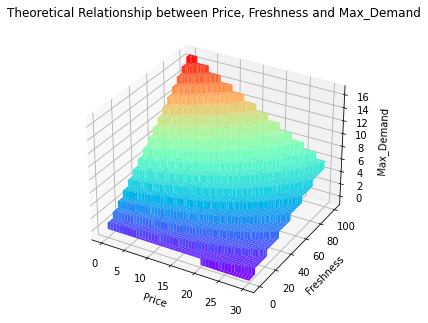

In [39]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(price, freshness, max_demand, cmap=plt.get_cmap('rainbow'))
ax.set_xlabel('Price')
ax.set_ylabel('Freshness')
ax.set_zlabel('Max_Demand')
plt.title('Theoretical Relationship between Price, Freshness and Max_Demand')
plt.show()

### Hurricane

In [40]:
hurr = hurricane.Hurricane()
month, dailyAvg = list(hurr.month_freq.keys()), list(hurr.month_freq.values())
monthlyAvg = [d*30 for d in dailyAvg]

In [54]:
N = 1000
sample = [list(np.floor(np.array(hurr.hurricane_simulation()) / 30) + 1) for _ in range(N)]
sample = sum(sample, [])

In [56]:
unique, counts = np.unique(sample, return_counts=True)

In [68]:
freq_map = collections.defaultdict(int)
for m in month:
    freq_map[m]
for m, c in zip(unique, counts):
    freq_map[int(m)] = c

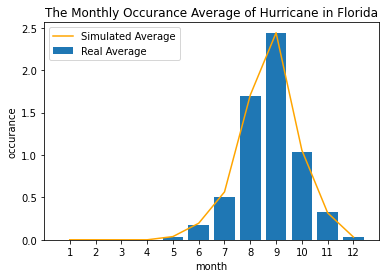

In [88]:
plt.bar(month, monthlyAvg, label='Real Average')
plt.plot(month, np.array(list(freq_map.values())) / N, label='Simulated Average', color='orange')
plt.xticks(month)
plt.title('The Monthly Occurance Average of Hurricane in Florida')
plt.ylabel('occurance')
plt.xlabel('month')
plt.legend()